### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlean as sqlite3
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('../models/model-best')

### Import Data

In [3]:
DATABASE_PATH = 'C:/University/6G7V0007_MSC_Project/Project/Data/joblistings_transformed.db'
con = sqlite3.connect(DATABASE_PATH)

In [4]:
job = pd.read_sql('SELECT * FROM job', con)
company = pd.read_sql('SELECT * FROM company', con)
website = pd.read_sql('SELECT * FROM website', con)

C:\Users\walte\AppData\Local\Temp\ipykernel_12104\1361633401.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  job = pd.read_sql('SELECT * FROM job', con)
C:\Users\walte\AppData\Local\Temp\ipykernel_12104\1361633401.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  company = pd.read_sql('SELECT * FROM company', con)
C:\Users\walte\AppData\Local\Temp\ipykernel_12104\1361633401.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  website = pd.read_sql('SELECT * FROM website', con)


In [5]:
job.set_index('id', inplace=True)
company.set_index('id', inplace=True)
website.set_index('id', inplace=True)

In [6]:
test = job.merge(company, left_on='company_id', right_index=True)

In [7]:
test.rename(columns={'name':'company_name'}, inplace=True)

In [8]:
test.head()

,website_id,company_id,title,location,pay,description,timestamp,company_name
id,,,,,,,,
1,1,1,Graduate Electronics/Computer Science Software...,Cirencester (Gloucestershire),"£30,000",About the role A unique opportunity to join a ...,2024-06-28,AccuLink Technology
145,1,1,Project Engineer,Cirencester (Gloucestershire),Competitive,AccuLink Technology specialises in the design ...,2024-06-28,AccuLink Technology
2,1,2,Graduate Software Development Engineer,London,Competitive,nFocus Graduate Academy Accelerate your career...,2024-06-28,nfocus
3,1,3,Graduate Technology Consultant,Manchester (Hybrid),Competitive,About Arlanis Reply: Arlanis Reply is the Repl...,2024-06-28,Reply
20,1,3,Graduate Software Developer,London and Manchester (Hybrid),Competitive,About Arlanis Reply: Arlanis Reply is the Repl...,2024-06-28,Reply


### Contractions

In [9]:
# Get a list of contractions found within the job listings
contractions = np.unique(test['description'].str.extractall(r"([a-zA-z]{1,}'[a-zA-Z]{1,})").values)
contractions

array(["AMS's", "API's", "Agency's", "Ali's", "Ally's", "America's",
       "Analyst's", "Apple's", "Arm's", "Army's", "Aurora's", "BCG's",
       "Bachelor's", "Bank's", "Batchelor's", "BlackRock's", "Blair's",
       "Bloomberg's", "Bright's", "ByteDance's", "C's", "CV's", "Cameo's",
       "Centre's", "Citi's", "Cleansing's", "Cloud's", "Combinator's",
       "Commission's", "Community's", "Company's", "Corero's",
       "Customer's", "DRW's", "DeepL's", "Dimensional's", "Don't",
       "Dona's", "Edinburgh's", "Employee's", "Europe's", "Exchange's",
       "FORTUNE's", "FT's", "FactSet's", "Filtration's", "GCP's", "GSK's",
       "Glue's", "Google's", "Group's", "HRT's", "HealthNet's", "Here's",
       "Honda's", "I'd", "I'm", "InMoment's", "It's", "Keltbray's",
       "King's", "LearnTech's", "Leonardo's", "Let's", "Live's",
       "Louise's", "Luminance's", "Mako's", "Master's", "Medidata's",
       "Meta's", "NexGen's", "Nokia's", "Oracle's", "PRMIA's",
       "Perforce's", "Pha

### Preprocessing for TF-IDF

In [19]:
# Extra stop words


In [20]:
# Set tokeniser to use only whitespace to split
# nlp.tokenizer = 

In [26]:
def tokenise(text):
    """Tokenise text"""
    return [token.text for token in nlp(text)]

In [27]:
def lemmatise(text):
    """Tokenise and lemmatise text"""
    return [token.lemma_ for token in nlp(text)]

In [10]:
def get_entities(text):
    """Return the named entities"""
    return [(ent.text, ent.label_) for ent in nlp(text).ents]

In [11]:
test['ents'] = test['description'].apply(get_entities)

In [12]:
test['ents'].head()

id
1      [(Python, LANG_FRAM), (work independently, S_S...
145    [(continuously push, S_SKILL), (confidence in ...
2      [(similarly technical degree, REQUIREMENT), (M...
3      [(implementation and design of elegant systems...
20     [(implementation and design of elegant systems...
Name: ents, dtype: object

In [38]:
entities = test.explode('ents')['ents']

In [42]:
ent_df = pd.DataFrame(entities.to_list())
ent_df.columns = ['ent', 'type']

In [46]:
ent_df.loc[ent_df['type'] == 'LANG_FRAM', 'ent'].value_counts()

ent
Python                   392
AI                       371
SQL                      272
cloud                    181
Azure                    177
                        ... 
Vulkan                     1
Apache Iceberg             1
C Basic computer           1
Graphics and graphics      1
Alderley                   1
Name: count, Length: 798, dtype: int64

In [47]:
# Export entity dataframe
ent_df.to_csv('C:/University/6G7V0007_MSC_Project/Project/Data/entities.csv')

In [30]:
#test['doc'] = test['description'].apply(tokenise)

In [31]:
# test['ents'].iloc[6]

In [32]:
#test['doc'].iloc[0]

['About',
 'the',
 'role',
 'A',
 'unique',
 'opportunity',
 'to',
 'join',
 'a',
 'growing',
 'new',
 'company',
 'developing',
 'some',
 'exciting',
 'products',
 'in',
 'the',
 '5',
 'G',
 'mobile',
 'infrastructure',
 'space',
 '.',
 'As',
 'a',
 'recent',
 'graduate',
 'you',
 'would',
 'be',
 'joining',
 'an',
 'R&D',
 'team',
 'involved',
 'in',
 'the',
 'design',
 ',',
 'development',
 'and',
 'manufacture',
 'of',
 'these',
 'products',
 '.',
 'The',
 'role',
 'will',
 'be',
 'able',
 'to',
 'take',
 'the',
 'skills',
 'learnt',
 'during',
 'your',
 'degree',
 'and',
 'apply',
 'them',
 'to',
 'real',
 'world',
 'applications',
 '.',
 'Working',
 'from',
 'requirements',
 'you',
 'will',
 'be',
 'expected',
 'to',
 'develop',
 'all',
 'forms',
 'of',
 'software',
 'across',
 'the',
 'full',
 'suite',
 ';',
 'from',
 'firmware',
 'on',
 'microprocessors',
 'such',
 'as',
 'the',
 'Raspberry',
 'PI',
 ',',
 'with',
 'code',
 'written',
 'in',
 '‘',
 'C',
 '’',
 'and/or',
 'Pytho

In [33]:
# Convert list to string
test['doc'] = test['doc'].apply(' '.join)

In [34]:
test.head()

,website_id,company_id,title,location,pay,description,timestamp,company_name,doc
id,,,,,,,,,
1,1,1,Graduate Electronics/Computer Science Software...,Cirencester (Gloucestershire),"£30,000",About the role A unique opportunity to join a ...,2024-06-28,AccuLink Technology,About the role A unique opportunity to join a ...
145,1,1,Project Engineer,Cirencester (Gloucestershire),Competitive,AccuLink Technology specialises in the design ...,2024-06-28,AccuLink Technology,AccuLink Technology specialises in the design ...
2,1,2,Graduate Software Development Engineer,London,Competitive,nFocus Graduate Academy Accelerate your career...,2024-06-28,nfocus,nFocus Graduate Academy Accelerate your career...
3,1,3,Graduate Technology Consultant,Manchester (Hybrid),Competitive,About Arlanis Reply: Arlanis Reply is the Repl...,2024-06-28,Reply,About Arlanis Reply : Arlanis Reply is the Rep...
20,1,3,Graduate Software Developer,London and Manchester (Hybrid),Competitive,About Arlanis Reply: Arlanis Reply is the Repl...,2024-06-28,Reply,About Arlanis Reply : Arlanis Reply is the Rep...


### Topic Clustering

In [35]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

In [36]:
cluster_nlp = spacy.load('en_core_web_sm', exclude=['tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer'])
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [37]:
topic_model = BERTopic(ctfidf_model=ctfidf_model)
topics, probs = topic_model.fit_transform(test['description'])

In [38]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,335,-1_we_is_our_team,"[we, is, our, team, are, will, be, you, experi...","[At GSK, we want to supercharge our data capab..."
1,0,100,0_web_developer_backend_software,"[web, developer, backend, software, frontend, ...",[BIG Motoring World Head of Software Developme...
2,1,89,1_data_bi_analytics_insights,"[data, bi, analytics, insights, science, sql, ...",[Overview As one of the fastest-growing and hi...
3,2,77,2_energy_engineering_carbon_electrical,"[energy, engineering, carbon, electrical, powe...",[Job Advert This is an outstanding opportunity...
4,3,73,3_support_issues_it_service,"[support, issues, it, service, customer, techn...","[Work Location : London, United Kingdom Hours:..."
5,4,61,4_ai_machine_learning_models,"[ai, machine, learning, models, ml, algorithms...","[Deep Learning Engineer (NLP) London, hybrid o..."
6,5,48,5_product_business_kt_bcg,"[product, business, kt, bcg, analyst, manageme...",[Description QR's reputation for product data ...
7,6,40,6_grayce_civil_opens_training,"[grayce, civil, opens, training, digital, wind...",[The opportunity We’re looking for an experien...
8,7,36,7_cern_fundamental_physicists_particles,"[cern, fundamental, physicists, particles, cer...","[About us At CERN, the European Organisation f..."
9,8,29,8_blackrock_investment_blackrocks_submit,"[blackrock, investment, blackrocks, submit, pr...",[The Full-Time Analyst Programme is for candid...


In [39]:
fig = topic_model.visualize_topics()
fig.show()

In [40]:
topic_df = pd.DataFrame({'topic':topics, 'job_listing':test['description']})

In [42]:
topic_df.loc[topic_df['topic'] == 0]

,topic,job_listing
id,,
257,0,Your responsibilities Your primary role will b...
10,0,Rewarding software engineering job for Compute...
37,0,Why Alscient? We provide great opportunities f...
340,0,Full-Stack Developer - Web Transcription Archi...
355,0,BIG Motoring World Developer role Hours: Full ...
...,...,...
1864,0,Junior Game Programmer Requirements for the ro...
1872,0,Job Overview: We're on the hunt for a talented...
1885,0,Web Developer (Junior to Mid-range) Hydro Clea...


### TF-IDF

In [25]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(test['doc'])

In [26]:
X = X.toarray()

In [27]:
df = pd.DataFrame(X, columns=tfidf.get_feature_names_out())

In [28]:
df.head()

,00,000,000p,000pa,000usd,001,00227646,00227647,009,0096,...,équipe,équité,été,éventail,évoluer,être,œuvre,ﬁeld,ﬂexibility,ﬂow
0,0.0,0.03551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
listing1 = df.iloc[0].loc[df.iloc[0].gt(0)]

In [33]:
listing1.sort_values(ascending=False).head(15)

development    0.268458
gui            0.221958
scrum          0.161889
expect         0.142804
cd             0.140824
software       0.140561
ci             0.136413
nodered        0.130334
code           0.126346
lld            0.123191
hld            0.123191
damage         0.123191
able           0.122924
product        0.119379
acumen         0.118122
Name: 0, dtype: float64

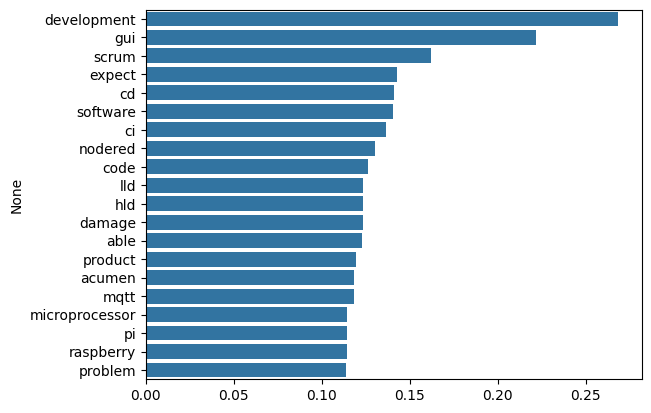

In [34]:
fig, ax = plt.subplots()
ax = sns.barplot(x=listing1.sort_values(ascending=False).head(20).values, y=listing1.sort_values(ascending=False).head(20).index)

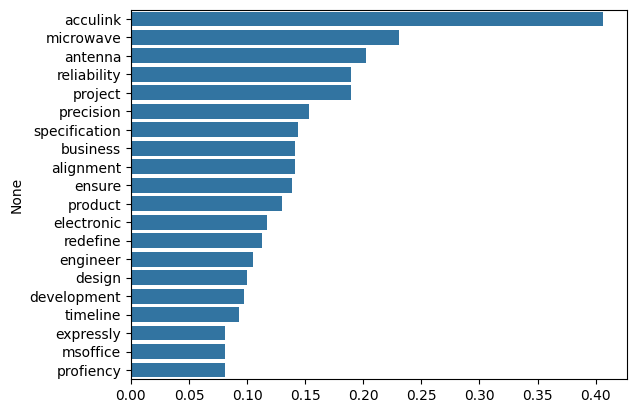

In [35]:
listing2 = df.iloc[1].loc[df.iloc[1].gt(0)]
fig, ax = plt.subplots()
ax = sns.barplot(x=listing2.sort_values(ascending=False).head(20).values, y=listing2.sort_values(ascending=False).head(20).index)

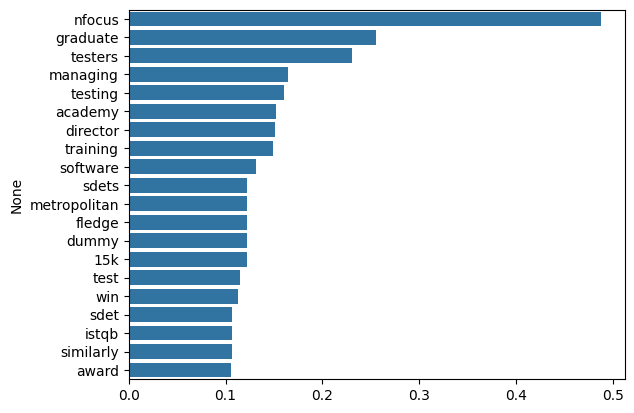

In [36]:
listing3 = df.iloc[2].loc[df.iloc[2].gt(0)]
fig, ax = plt.subplots()
ax = sns.barplot(x=listing3.sort_values(ascending=False).head(20).values, y=listing3.sort_values(ascending=False).head(20).index)

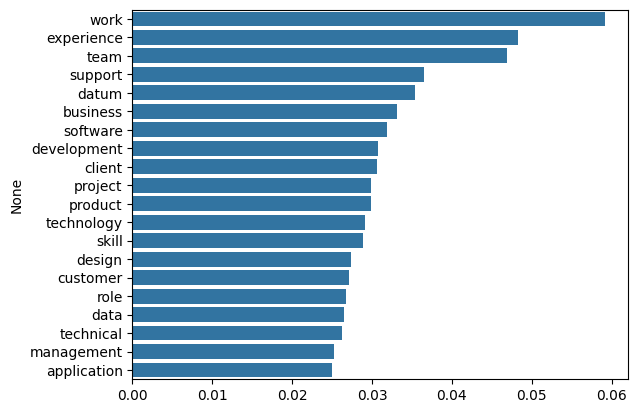

In [37]:
corpus = df.agg('mean').sort_values(ascending=False)
fig, ax = plt.subplots()
ax = sns.barplot(x=corpus.head(20).values, y=corpus.head(20).index)